In [1]:
using Pkg
Pkg.add("Latexify")
using Latexify

Pkg.add("Plots")
using Plots
Pkg.add("PyPlot")
pyplot()

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


┌ Warning: Some registries failed to update:
│     — /home/juser/.julia/registries/General — failed to fetch from repo
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Pkg/src/Types.jl:1269


 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


Plots.PyPlotBackend()

In [56]:
# Linear Stommel 1948 solution from Giraldo and Warburton, 2008 "High-order Triangular DG Oceanic Shallow Water Model", Int. J. Numer. Meth. Fluids, 56:899-925
# see section 5.1.3 "Linear Stommel Model"

# Problem setup
γ=1.e-6                 # Linear drag (s-1)
L=1e6                   # Basin size in X and Y (m)
L_x=L
L_y=L
β=1.e-11                # Rate of change of Coriolis with distance  ( (s-1)/m )
f₀=1.e-4                # Coriolis ( s-1 )
τ=0.2                   # Wind stress ( N m-2 )
ρ=1000                  # Density ( kg m-3 )
H=1000                  # Fluid depth ( m )
grav=10                 # grav ( m^2 s-1 )
Δ=L/100                 # Nominal spacing

    
# Working variables
β_p=β*L_y/f₀
ϵ=γ/(L*β)

0.1

In [57]:
ETMP=:( sqrt(1+(2*π*ϵ)^2)    )
R₊exp=:( ( -1+$ETMP )/(2*ϵ) )
R₋exp=:( ( -1-$ETMP )/(2*ϵ) )
R₊def=:( R₊=$R₊exp )
R₋def=:( R₋=$R₋exp )
display(latexify(R₊def))   
display(latexify(R₋def))

L"$R_+ = \frac{-1 + \sqrt{1 + \left( 2 \cdot \pi \cdot \epsilon \right)^{2}}}{2 \cdot \epsilon}$"

L"$R_- = \frac{-1 - \sqrt{1 + \left( 2 \cdot \pi \cdot \epsilon \right)^{2}}}{2 \cdot \epsilon}$"

In [58]:
ETMP01=:( R₊*(exp(R₋)-1)   )
ETMP02=:( R₋*(1-exp(R₊))   )
ETMP03=:( exp(R₊)-exp(R₋)  )
Dexpr=:( ( $ETMP01+$ETMP02 ) / $ETMP03 )
Ddef=:( D = $Dexpr )
display(latexify(Ddef))  

L"$D = \frac{R_+ \cdot \left( e^{R_-} - 1 \right) + R_- \cdot \left( 1 - e^{R_+} \right)}{e^{R_+} - e^{R_-}}$"

In [59]:
ETMP04=:($ETMP01*exp(R₊*x₁))
ETMP05=:($ETMP02*exp(R₋*x₁))
R₂expr=:( 1/D*( ($ETMP04+$ETMP05 )/$ETMP03 ) )
R₂def=:( R₂ = $R₂expr )
display(latexify(R₂def))

L"$R_2 = \frac{1}{D} \cdot \frac{R_+ \cdot \left( e^{R_-} - 1 \right) \cdot e^{R_+ \cdot x_1} + R_- \cdot \left( 1 - e^{R_+} \right) \cdot e^{R_- \cdot x_1}}{e^{R_+} - e^{R_-}}$"

In [60]:
ETMP06=:((exp(R₋)-1)*exp(R₊*x₁))
ETMP07=:((1-exp(R₊))*exp(R₋*x₁))
R₁expr=:( π/D*((1.0.+(($ETMP06.+$ETMP07))/($ETMP03))) )
R₁def=:( R₁ = $R₁expr )
display(latexify(R₁def,env=:inline))

L"$R_1 = \frac{\pi}{D} \cdot 1.0 + \frac{\left( e^{R_-} - 1 \right) \cdot e^{R_+ \cdot x_1} + \left( 1 - e^{R_+} \right) \cdot e^{R_- \cdot x_1}}{e^{R_+} - e^{R_-}}$"

In [61]:
u_scale_expr=:(τ*D/(ρ*H*γ*π))
u_scale_def=:(u_scale = $u_scale_expr )
display(latexify(u_scale_def,env=:inline))

L"$u_{scale} = \frac{\tau \cdot D}{\rho \cdot H \cdot \gamma \cdot \pi}$"

In [62]:
h_scale_expr=:(f₀*L*u_scale/grav)
h_scale_def=:( h_scale = $h_scale_expr)
display(latexify(h_scale_def,env=:inline))

L"$h_{scale} = \frac{f_0 \cdot L \cdot u_{scale}}{grav}$"

In [63]:
U_curly_expr=:(R₁*sin.(π*y₁))
U_curly_def=:( U_curly = $U_curly_expr )
display(latexify(U_curly_def,env=:inline))

L"$U_{curly} = R_1 \cdot \sin\left( \pi \cdot y_1 \right)$"

In [64]:
V_curly_expr=:(R₂*cos.(π*y₁))
V_curly_def=:( V_curly = $V_curly_expr )
display(latexify(V_curly_def,env=:inline))

L"$V_{curly} = R_2 \cdot \cos\left( \pi \cdot y_1 \right)$"

In [65]:
Hexpr01=:(-R₂/(π*f₀)*γ*sin(π*y₁))
Hexpr02=:( R₁/(π)*( ( cos(π*y₁)*(1.0+β_p*y₁) ) - β_p/π*sin(π*y₁) )  )
Hexpr=:($Hexpr01 + $Hexpr02)
Hexpr_def=:( H_curly = $Hexpr)

:(H_curly = (-R₂ / (π * f₀)) * γ * sin(π * y₁) + (R₁ / π) * (cos(π * y₁) * (1.0 + β_p * y₁) - (β_p / π) * sin(π * y₁)))

In [66]:
function showdef(m)
 display(latexify(Hexpr_def,env=m))
 display(latexify(U_curly_def,env=m))
 display(latexify(V_curly_def,env=m))
 display(latexify(u_scale_def,env=m))
 display(latexify(h_scale_def,env=m))
 display(latexify(R₁def,env=m))
 display(latexify(R₂def,env=m))
 display(latexify(Ddef,env=m))  
 display(latexify(R₊def,env=m))   
 display(latexify(R₋def,env=m))
    
 display(Hexpr_def)
 display(U_curly_def)
 display(V_curly_def)
 display(u_scale_def)
 display(h_scale_def)
 display(R₁def)
 display(R₂def)
 display(Ddef)  
 display(R₊def)   
 display(R₋def)
end
showdef(:inline)

L"$H_{curly} = \frac{ - R_2}{\pi \cdot f_0} \cdot \gamma \cdot \sin\left( \pi \cdot y_1 \right) + \frac{R_1}{\pi} \cdot \left( \cos\left( \pi \cdot y_1 \right) \cdot \left( 1.0 + \beta_{p} \cdot y_1 \right) - \frac{\beta_{p}}{\pi} \cdot \sin\left( \pi \cdot y_1 \right) \right)$"

L"$U_{curly} = R_1 \cdot \sin\left( \pi \cdot y_1 \right)$"

L"$V_{curly} = R_2 \cdot \cos\left( \pi \cdot y_1 \right)$"

L"$u_{scale} = \frac{\tau \cdot D}{\rho \cdot H \cdot \gamma \cdot \pi}$"

L"$h_{scale} = \frac{f_0 \cdot L \cdot u_{scale}}{grav}$"

L"$R_1 = \frac{\pi}{D} \cdot 1.0 + \frac{\left( e^{R_-} - 1 \right) \cdot e^{R_+ \cdot x_1} + \left( 1 - e^{R_+} \right) \cdot e^{R_- \cdot x_1}}{e^{R_+} - e^{R_-}}$"

L"$R_2 = \frac{1}{D} \cdot \frac{R_+ \cdot \left( e^{R_-} - 1 \right) \cdot e^{R_+ \cdot x_1} + R_- \cdot \left( 1 - e^{R_+} \right) \cdot e^{R_- \cdot x_1}}{e^{R_+} - e^{R_-}}$"

L"$D = \frac{R_+ \cdot \left( e^{R_-} - 1 \right) + R_- \cdot \left( 1 - e^{R_+} \right)}{e^{R_+} - e^{R_-}}$"

L"$R_+ = \frac{-1 + \sqrt{1 + \left( 2 \cdot \pi \cdot \epsilon \right)^{2}}}{2 \cdot \epsilon}$"

L"$R_- = \frac{-1 - \sqrt{1 + \left( 2 \cdot \pi \cdot \epsilon \right)^{2}}}{2 \cdot \epsilon}$"

:(H_curly = (-R₂ / (π * f₀)) * γ * sin(π * y₁) + (R₁ / π) * (cos(π * y₁) * (1.0 + β_p * y₁) - (β_p / π) * sin(π * y₁)))

:(U_curly = R₁ * sin.(π * y₁))

:(V_curly = R₂ * cos.(π * y₁))

:(u_scale = (τ * D) / (ρ * H * γ * π))

:(h_scale = (f₀ * L * u_scale) / grav)

:(R₁ = (π / D) * (1.0 .+ ((exp(R₋) - 1) * exp(R₊ * x₁) .+ (1 - exp(R₊)) * exp(R₋ * x₁)) / (exp(R₊) - exp(R₋))))

:(R₂ = (1 / D) * (((R₊ * (exp(R₋) - 1)) * exp(R₊ * x₁) + (R₋ * (1 - exp(R₊))) * exp(R₋ * x₁)) / (exp(R₊) - exp(R₋))))

:(D = (R₊ * (exp(R₋) - 1) + R₋ * (1 - exp(R₊))) / (exp(R₊) - exp(R₋)))

:(R₊ = (-1 + sqrt(1 + (2 * π * ϵ) ^ 2)) / (2ϵ))

:(R₋ = (-1 - sqrt(1 + (2 * π * ϵ) ^ 2)) / (2ϵ))

In [67]:
R₋ = (-1 - sqrt(1 + (2 * π * ϵ) ^ 2)) / (2ϵ)
R₊ = (-1 + sqrt(1 + (2 * π * ϵ) ^ 2)) / (2ϵ)
D = (R₊ * (exp(R₋) - 1) + R₋ * (1 - exp(R₊))) / (exp(R₊) - exp(R₋))
R₂(x₁) = (1 / D) * (((R₊ * (exp(R₋) - 1)) * exp(R₊ * x₁) + (R₋ * (1 - exp(R₊))) * exp(R₋ * x₁)) / (exp(R₊) - exp(R₋)))
R₁(x₁) = (π / D) * (1.0 .+ ((exp(R₋) - 1) * exp(R₊ * x₁) .+ (1 - exp(R₊)) * exp(R₋ * x₁)) / (exp(R₊) - exp(R₋)))
u_scale = (τ * D) / (ρ * H * γ * π)
h_scale = (f₀ * L * u_scale) / grav
V_curly(x₁,y₁) = R₂(x₁) * cos.(π * y₁)
U_curly(x₁,y₁) = R₁(x₁) * sin.(π * y₁)
H_curly(x₁,y₁) = (-R₂(x₁) / (π * f₀)) * γ * sin(π * y₁) + (R₁(x₁) / π) * (cos(π * y₁) * (1.0 + β_p * y₁) - (β_p / π) * sin(π * y₁))


H_curly (generic function with 1 method)

In [68]:
# Temporary grid locations for plotting (should come from DG mesh function)
x=collect(range(0.,L_x,step=Δ))
x̃=x./L_x
y=collect(range(0.,L_y,step=Δ))
ỹ=y./L_y
nx=length( x̃ )
ny=length( ỹ )
Hval=zeros(nx,ny)
Uval=zeros(nx,ny)
Vval=zeros(nx,ny)
for j=1:ny
 for i=1:nx
  x₁=x̃[i]
  y₁=ỹ[j]
  Hval[i,j]=H_curly(x₁,y₁)
  Uval[i,j]=U_curly(x₁,y₁)
  Vval[i,j]=V_curly(x₁,y₁)
 end
end

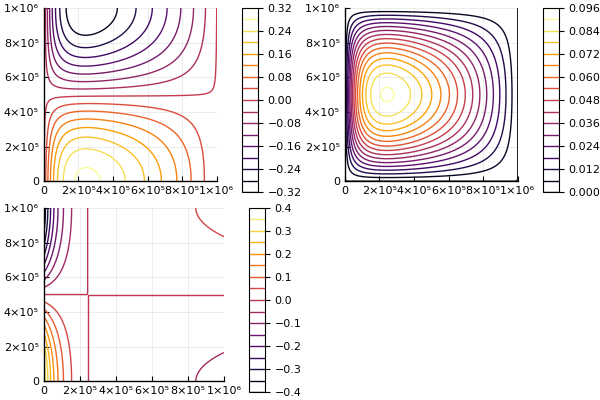

In [69]:
p1 = contour(y, x, h_scale.*Hval')
p2 = contour(y, x, u_scale.*Uval')
p3 = contour(y, x, u_scale.*Vval')
plot(p1,p2,p3)